In [19]:
!pip install snowflake-connector-python
!pip install python-dotenv
!pip install pandas
!pip install openpyxl


In [20]:
import snowflake.connector
import pandas as pd
import os
from snowflake.connector import connect
from snowflake.connector.errors import DatabaseError, ProgrammingError, OperationalError
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()
import numpy as np




In [21]:
def connect_with_snowflake_connector():
    """
    Connect to Snowflake, execute a query, and return the result as a Pandas DataFrame.
    """
    try:
        # Retrieve credentials securely from environment variables
        account = os.getenv('SNOWFLAKE_ACCOUNT', 'sa86899.eu-central-2.aws')
        user = os.getenv('SNOWFLAKE_USER', 'data_scientist')
        password = os.getenv('SNOWFLAKE_PASSWORD', 'DataScientist1124')
        warehouse = os.getenv('SNOWFLAKE_WAREHOUSE', 'amdari_wh')
        database = os.getenv('SNOWFLAKE_DATABASE', 'amdari_db')
        schema = os.getenv('SNOWFLAKE_SCHEMA', 'public')
        role = os.getenv('SNOWFLAKE_ROLE', 'data_scientist_role')

        # Ensure all credentials are present
        if not all([account, user, password, warehouse, database, schema, role]):
            raise ValueError("Missing required Snowflake credentials. Check environment variables.")

        # Connect to Snowflake
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            warehouse=warehouse,
            database=database,
            schema=schema,
            role=role,
            client_session_keep_alive=True,
            client_prefetch_threads=10
        )

        # Create a cursor
        cursor = conn.cursor()

        # Example query
        query = "SELECT * FROM tbl_hr_data"
        cursor.execute(query)

        # Fetch results
        results = cursor.fetchall()

        # Convert results to Pandas DataFrame
        columns = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(results, columns=columns)

        # Close cursor and connection
        cursor.close()
        conn.close()

        return df

    except ProgrammingError as e:
        print(f"Programming Error connecting to Snowflake: {e}")
        return None
    except DatabaseError as e:
        print(f"Database Connection Error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None


In [22]:
def main():
    global data2  # Declare global variable to use outside this function
    data2 = connect_with_snowflake_connector()  # Fetch the data from Snowflake

    if data2 is not None:
        print("✅ Data successfully retrieved from Snowflake!")

        # Display DataFrame shape
        print("\n📌 DataFrame Shape:", data2.shape)

        # Display DataFrame columns
        print("\n📌 Columns:", list(data2.columns))

        # Display first 10 rows
        print("\n📌 First 10 rows:")
        print(data2.head(10))

        # Display summary statistics
        print("\n📌 Descriptive Statistics:")
        print(data2.describe())

    else:
        print("❌ Failed to retrieve data from Snowflake.")


In [23]:
if __name__ == "__main__":
    main()

# If you want to see the first few rows of the DataFrame
data2.head()


✅ Data successfully retrieved from Snowflake!

📌 DataFrame Shape: (5000, 16)

📌 Columns: ['SATISFACTION_LEVEL', 'LAST_EVALUATION', 'NUMBER_PROJECT', 'AVERAGE_MONTLY_HOURS', 'TIME_SPEND_COMPANY', 'WORK_ACCIDENT', 'QUIT_THE_COMPANY', 'PROMOTION_LAST_5YEARS', 'DEPARTMENTS', 'SALARY', 'EMPLOYEE_ID', 'ABSENTEEISM', 'JOB_ROLE', 'MANAGER_FEEDBACK_SCORE', 'REMOTE_WORK', 'ENGAGEMENT_SCORE']

📌 First 10 rows:
  SATISFACTION_LEVEL LAST_EVALUATION NUMBER_PROJECT  AVERAGE_MONTLY_HOURS  \
0               0.32            0.97            6.0                   272   
1               None            0.50            2.0                   683   
2               0.79            0.60            5.0                   223   
3               0.81            0.98            6.0                   196   
4               0.39            0.56            2.0                   133   
5               None            0.96            4.0                   646   
6               0.83            0.37            5.0       

,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,AVERAGE_MONTLY_HOURS,TIME_SPEND_COMPANY,WORK_ACCIDENT,QUIT_THE_COMPANY,PROMOTION_LAST_5YEARS,DEPARTMENTS,SALARY,EMPLOYEE_ID,ABSENTEEISM,JOB_ROLE,MANAGER_FEEDBACK_SCORE,REMOTE_WORK,ENGAGEMENT_SCORE
0,0.32,0.97,6.0,272,2.0,0.0,0,0,sales,low,EMP03596,11,Sales Executive,2.6,1,0.29
1,None,0.50,2.0,683,3.0,0.0,1,0,support,med,EMP00885,2,Customer Support,None,0,None
2,0.79,0.60,5.0,223,3.0,0.0,0,0,sales,low,EMP06351,8,Sales Executive,6.8,1,0.74
3,0.81,0.98,6.0,196,2.0,0.0,0,0,support,low,EMP05698,6,Customer Support,8.8,1,0.85
4,0.39,0.56,2.0,133,3.0,0.0,1,0,technical,low,EMP01492,15,Software Engineer,5.5,1,0.47


In [24]:
data2.to_csv("/content/snowflake_data.csv", index=False)

In [25]:
import os
os.environ['SNOWFLAKE_ACCOUNT'] = "sa86899.eu-central-2.aws"
os.environ['SNOWFLAKE_USER'] = "data_scientist"
os.environ['SNOWFLAKE_PASSWORD'] = "DataScientist1124"
os.environ['SNOWFLAKE_WAREHOUSE'] = "amdari_wh"
os.environ['SNOWFLAKE_DATABASE'] = "amdari_db"
os.environ['SNOWFLAKE_SCHEMA'] = "public"
os.environ['SNOWFLAKE_ROLE'] = "data_scientist_role"


In [26]:
if __name__ == "__main__":
    main()



✅ Data successfully retrieved from Snowflake!

📌 DataFrame Shape: (5000, 16)

📌 Columns: ['SATISFACTION_LEVEL', 'LAST_EVALUATION', 'NUMBER_PROJECT', 'AVERAGE_MONTLY_HOURS', 'TIME_SPEND_COMPANY', 'WORK_ACCIDENT', 'QUIT_THE_COMPANY', 'PROMOTION_LAST_5YEARS', 'DEPARTMENTS', 'SALARY', 'EMPLOYEE_ID', 'ABSENTEEISM', 'JOB_ROLE', 'MANAGER_FEEDBACK_SCORE', 'REMOTE_WORK', 'ENGAGEMENT_SCORE']

📌 First 10 rows:
  SATISFACTION_LEVEL LAST_EVALUATION NUMBER_PROJECT  AVERAGE_MONTLY_HOURS  \
0               0.32            0.97            6.0                   272   
1               None            0.50            2.0                   683   
2               0.79            0.60            5.0                   223   
3               0.81            0.98            6.0                   196   
4               0.39            0.56            2.0                   133   
5               None            0.96            4.0                   646   
6               0.83            0.37            5.0       

In [27]:

# If you want to see the first few rows of the DataFrame
data2.head()

,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,AVERAGE_MONTLY_HOURS,TIME_SPEND_COMPANY,WORK_ACCIDENT,QUIT_THE_COMPANY,PROMOTION_LAST_5YEARS,DEPARTMENTS,SALARY,EMPLOYEE_ID,ABSENTEEISM,JOB_ROLE,MANAGER_FEEDBACK_SCORE,REMOTE_WORK,ENGAGEMENT_SCORE
0,0.32,0.97,6.0,272,2.0,0.0,0,0,sales,low,EMP03596,11,Sales Executive,2.6,1,0.29
1,None,0.50,2.0,683,3.0,0.0,1,0,support,med,EMP00885,2,Customer Support,None,0,None
2,0.79,0.60,5.0,223,3.0,0.0,0,0,sales,low,EMP06351,8,Sales Executive,6.8,1,0.74
3,0.81,0.98,6.0,196,2.0,0.0,0,0,support,low,EMP05698,6,Customer Support,8.8,1,0.85
4,0.39,0.56,2.0,133,3.0,0.0,1,0,technical,low,EMP01492,15,Software Engineer,5.5,1,0.47


In [28]:
data2.tail()

,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,AVERAGE_MONTLY_HOURS,TIME_SPEND_COMPANY,WORK_ACCIDENT,QUIT_THE_COMPANY,PROMOTION_LAST_5YEARS,DEPARTMENTS,SALARY,EMPLOYEE_ID,ABSENTEEISM,JOB_ROLE,MANAGER_FEEDBACK_SCORE,REMOTE_WORK,ENGAGEMENT_SCORE
4995,0.74,0.71,4.0,133,2.0,0.0,0,0,technical,medium,EMP04008,9,Software Engineer,6.6,1,0.70
4996,0.21,0.81,4.0,227,5.0,0.0,0,0,marketing,medium,EMP07411,11,Marketing Analyst,3.4,0,0.27
4997,0.21,0.58,5.0,197,4.0,0.0,0,0,technical,low,EMP05690,16,Software Engineer,2.4,0,0.22
4998,0.75,0.79,4.0,176,4.0,1.0,0,0,support,medium,EMP06533,8,Customer Support,7.9,0,0.77
4999,0.78,0.87,4.0,264,3.0,0.0,0,0,accounting,medium,EMP04811,6,Financial Analyst,9.4,0,0.86


In [29]:
# Dimensionality of the data-the number of rows and columns
df = data2.shape
print(df)


(5000, 16)


In [30]:
#Examine the columns/features of the data
data2.columns

Index(['SATISFACTION_LEVEL', 'LAST_EVALUATION', 'NUMBER_PROJECT',
       'AVERAGE_MONTLY_HOURS', 'TIME_SPEND_COMPANY', 'WORK_ACCIDENT',
       'QUIT_THE_COMPANY', 'PROMOTION_LAST_5YEARS', 'DEPARTMENTS', 'SALARY',
       'EMPLOYEE_ID', 'ABSENTEEISM', 'JOB_ROLE', 'MANAGER_FEEDBACK_SCORE',
       'REMOTE_WORK', 'ENGAGEMENT_SCORE'],
      dtype='object')

In [31]:
# Investigate the dataset for annomalies and data type
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SATISFACTION_LEVEL      4600 non-null   object
 1   LAST_EVALUATION         5000 non-null   object
 2   NUMBER_PROJECT          4999 non-null   object
 3   AVERAGE_MONTLY_HOURS    5000 non-null   int64 
 4   TIME_SPEND_COMPANY      4999 non-null   object
 5   WORK_ACCIDENT           4999 non-null   object
 6   QUIT_THE_COMPANY        5000 non-null   int64 
 7   PROMOTION_LAST_5YEARS   5000 non-null   int64 
 8   DEPARTMENTS             5000 non-null   object
 9   SALARY                  5000 non-null   object
 10  EMPLOYEE_ID             5000 non-null   object
 11  ABSENTEEISM             5000 non-null   int64 
 12  JOB_ROLE                4562 non-null   object
 13  MANAGER_FEEDBACK_SCORE  4600 non-null   object
 14  REMOTE_WORK             5000 non-null   int64 
 15  ENGA

In [32]:
# Numerical Statistical Analysis
data2.describe()

,AVERAGE_MONTLY_HOURS,QUIT_THE_COMPANY,PROMOTION_LAST_5YEARS,ABSENTEEISM,REMOTE_WORK
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,232.649800,0.241000,0.019200,6.576800,0.341000
std,119.034028,0.427733,0.137241,4.722093,0.474093
min,96.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,0.000000,0.000000,3.000000,0.000000
50%,209.000000,0.000000,0.000000,6.000000,0.000000
75%,254.000000,0.000000,0.000000,9.000000,1.000000
max,699.000000,1.000000,1.000000,19.000000,1.000000


In [33]:
# Categorical statistical Analysis
data2.describe(include='object')

,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,TIME_SPEND_COMPANY,WORK_ACCIDENT,DEPARTMENTS,SALARY,EMPLOYEE_ID,JOB_ROLE,MANAGER_FEEDBACK_SCORE,ENGAGEMENT_SCORE
count,4600,5000,4999,4999,4999,5000,5000,5000,4562,4600,4600
unique,92,65,6,8,2,12,6,5000,9,91,91
top,0.10,0.54,4.0,3.0,0.0,sales,low,EMP03596,Sales Executive,10.0,0.90
freq,105,130,1498,2125,4308,1244,2258,1,1244,258,114


In [34]:
# Dealing with missing values
data2.isnull().sum()

,0
SATISFACTION_LEVEL,400
LAST_EVALUATION,0
NUMBER_PROJECT,1
AVERAGE_MONTLY_HOURS,0
TIME_SPEND_COMPANY,1
WORK_ACCIDENT,1
QUIT_THE_COMPANY,0
PROMOTION_LAST_5YEARS,0
DEPARTMENTS,0
SALARY,0


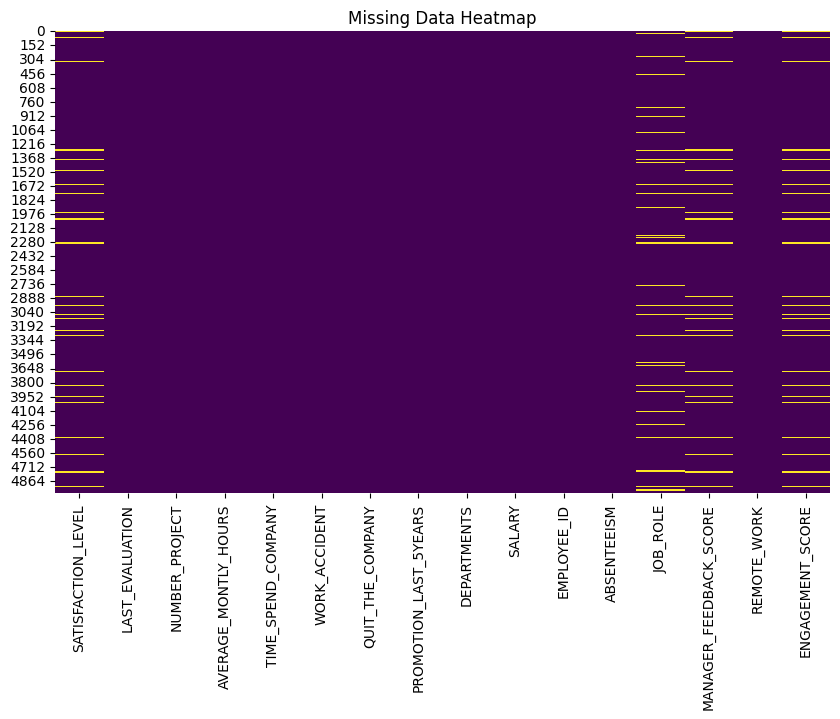

In [35]:
# Visualize the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



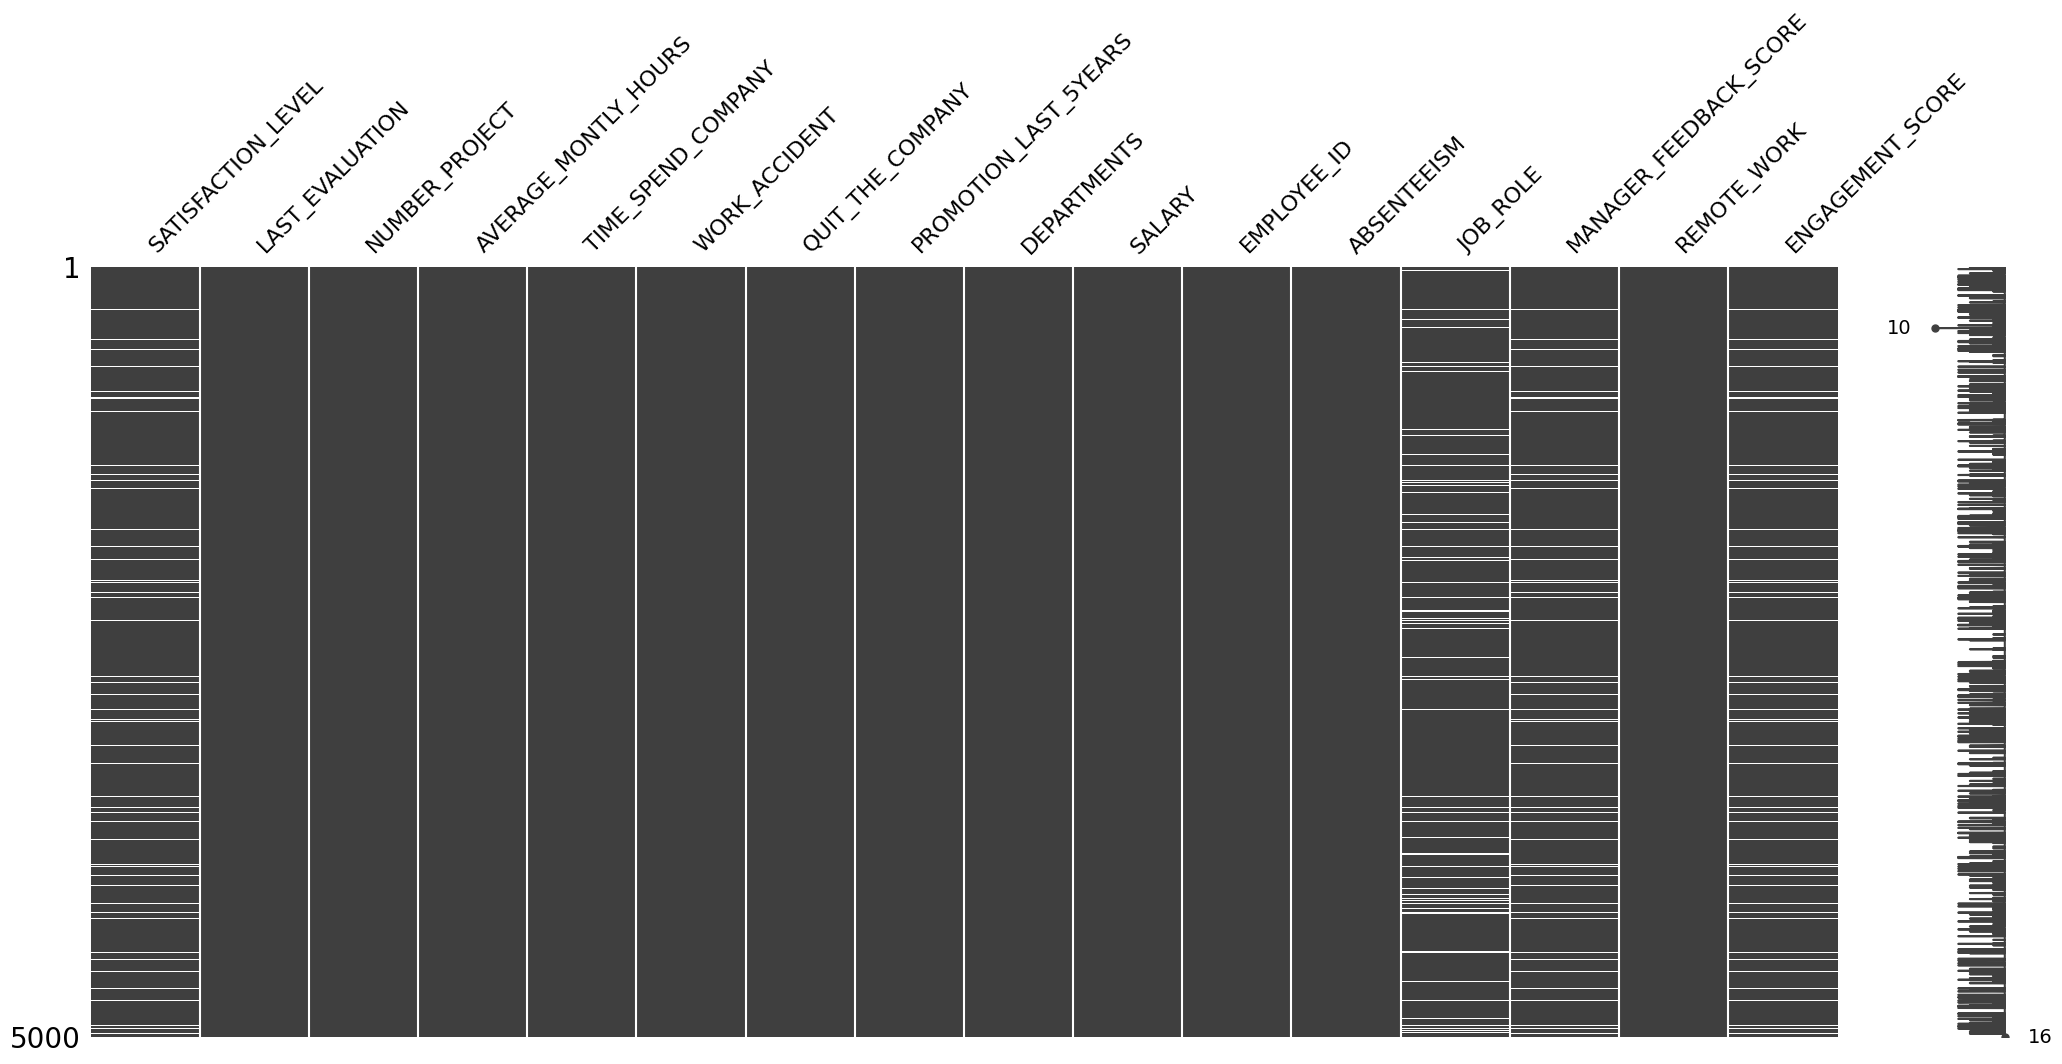

In [38]:
!pip install missingno
import missingno as msno # Import the missingno library and alias it as 'msno'

# ... (rest of your code) ...

#visualize the missing data
msno.matrix(data2)

plt.show()

In [39]:
# Improved cleaning function to avoid chained assignment warning
def clean_dataset(df):
    df = df.copy()  # Ensure we work with a separate copy of the DataFrame

    # 1. Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # 2. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical column
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        else:  # Numeric column
            df.loc[:, col] = df[col].fillna(df[col].median())

    # 3. Handle outliers using IQR method
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with upper/lower bound
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

# Apply the improved cleaning function to dataset
cleaned_data = clean_dataset(data2)



<ipython-input-39-d0907365d92f>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


In [40]:
def clean_dataset(df):
    df = df.copy()  # Ensure we work with a separate copy of the DataFrame

    # 1. Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # 2. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical column
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        else:  # Numeric column
            df.loc[:, col] = df[col].fillna(df[col].median())

    # 3. Handle outliers using IQR method
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Explicitly cast to the column's data type
        lower_bound = df[col].dtype.type(lower_bound)
        upper_bound = df[col].dtype.type(upper_bound)

        # Replace outliers with upper/lower bound
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SATISFACTION_LEVEL      4600 non-null   object
 1   LAST_EVALUATION         5000 non-null   object
 2   NUMBER_PROJECT          4999 non-null   object
 3   AVERAGE_MONTLY_HOURS    5000 non-null   int64 
 4   TIME_SPEND_COMPANY      4999 non-null   object
 5   WORK_ACCIDENT           4999 non-null   object
 6   QUIT_THE_COMPANY        5000 non-null   int64 
 7   PROMOTION_LAST_5YEARS   5000 non-null   int64 
 8   DEPARTMENTS             5000 non-null   object
 9   SALARY                  5000 non-null   object
 10  EMPLOYEE_ID             5000 non-null   object
 11  ABSENTEEISM             5000 non-null   int64 
 12  JOB_ROLE                4562 non-null   object
 13  MANAGER_FEEDBACK_SCORE  4600 non-null   object
 14  REMOTE_WORK             5000 non-null   int64 
 15  ENGA

In [42]:
#drop the missing data
data2.dropna(inplace=True)

In [43]:
data2.isnull().sum()

,0
SATISFACTION_LEVEL,0
LAST_EVALUATION,0
NUMBER_PROJECT,0
AVERAGE_MONTLY_HOURS,0
TIME_SPEND_COMPANY,0
WORK_ACCIDENT,0
QUIT_THE_COMPANY,0
PROMOTION_LAST_5YEARS,0
DEPARTMENTS,0
SALARY,0


In [44]:
data2.columns

Index(['SATISFACTION_LEVEL', 'LAST_EVALUATION', 'NUMBER_PROJECT',
       'AVERAGE_MONTLY_HOURS', 'TIME_SPEND_COMPANY', 'WORK_ACCIDENT',
       'QUIT_THE_COMPANY', 'PROMOTION_LAST_5YEARS', 'DEPARTMENTS', 'SALARY',
       'EMPLOYEE_ID', 'ABSENTEEISM', 'JOB_ROLE', 'MANAGER_FEEDBACK_SCORE',
       'REMOTE_WORK', 'ENGAGEMENT_SCORE'],
      dtype='object')

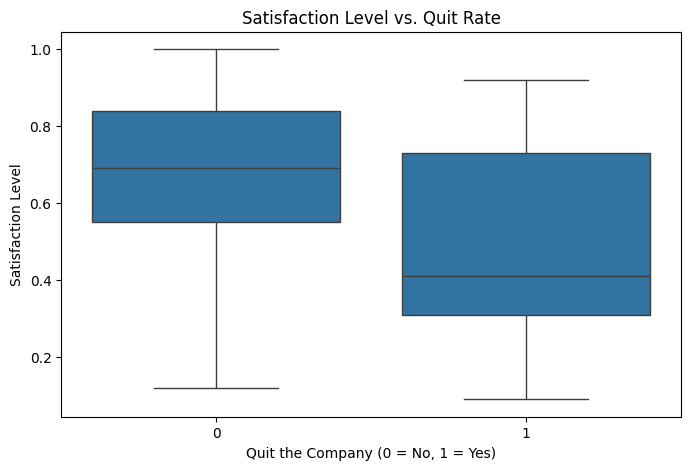

In [46]:
# visualize relationships between the labels and some key features
# Plot 1: Satisfaction Level vs. Quit Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='QUIT_THE_COMPANY', y='SATISFACTION_LEVEL', data=data2) # Change df to data2
plt.title("Satisfaction Level vs. Quit Rate")
plt.xlabel("Quit the Company (0 = No, 1 = Yes)")
plt.ylabel("Satisfaction Level")
plt.show()

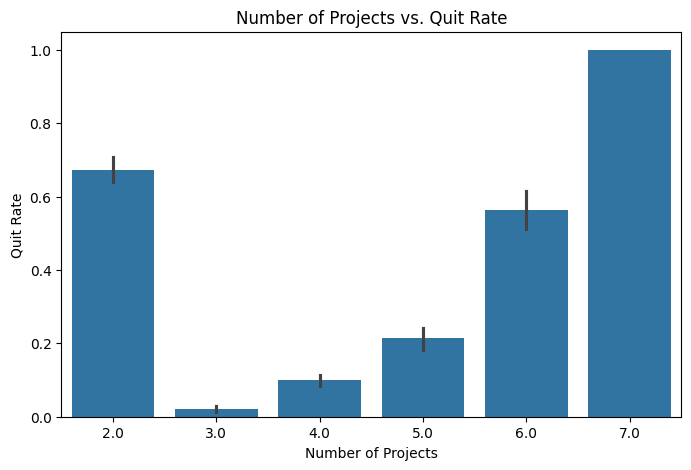

In [48]:
# Plot 2: Number of Projects vs. Quit Rate
plt.figure(figsize=(8, 5))
sns.barplot(x='NUMBER_PROJECT', y='QUIT_THE_COMPANY', data=data2) # Change df to data2
plt.title("Number of Projects vs. Quit Rate")
plt.xlabel("Number of Projects")
plt.ylabel("Quit Rate")
plt.show()

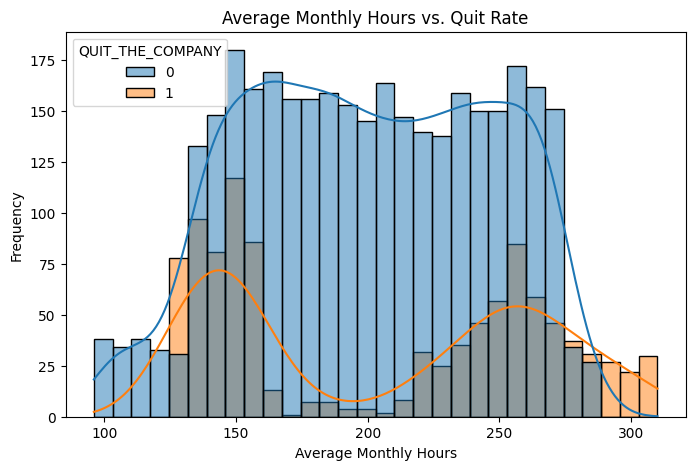

In [50]:
# Plot 3: Average Monthly Hours vs. Quit Rate
plt.figure(figsize=(8, 5))
# Replace 'df' with 'data2' in the sns.histplot function call
sns.histplot(data2, x='AVERAGE_MONTLY_HOURS', hue='QUIT_THE_COMPANY', kde=True, bins=30)
plt.title("Average Monthly Hours vs. Quit Rate")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Frequency")
plt.show()

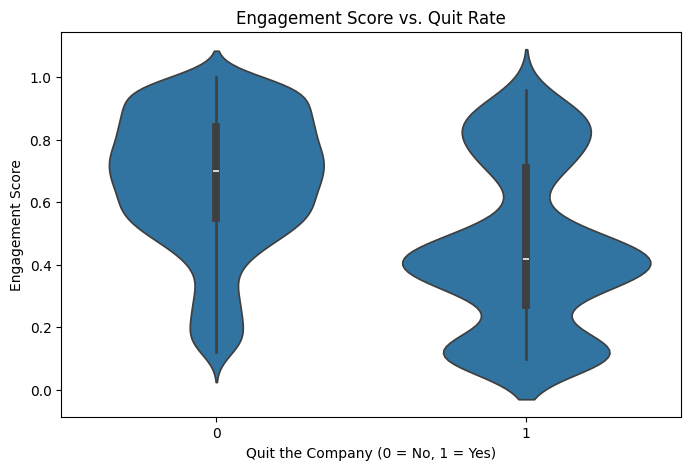

In [52]:
# Plot 4: Engagement Score vs. Quit Rate
plt.figure(figsize=(8, 5))
sns.violinplot(x='QUIT_THE_COMPANY', y='ENGAGEMENT_SCORE', data=data2) # Change df to data2
plt.title("Engagement Score vs. Quit Rate")
plt.xlabel("Quit the Company (0 = No, 1 = Yes)")
plt.ylabel("Engagement Score")
plt.show()

<ipython-input-56-140426d5cde9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SALARY', y='QUIT_THE_COMPANY', data=data2, ci=None, order=['low', 'medium', 'high'])


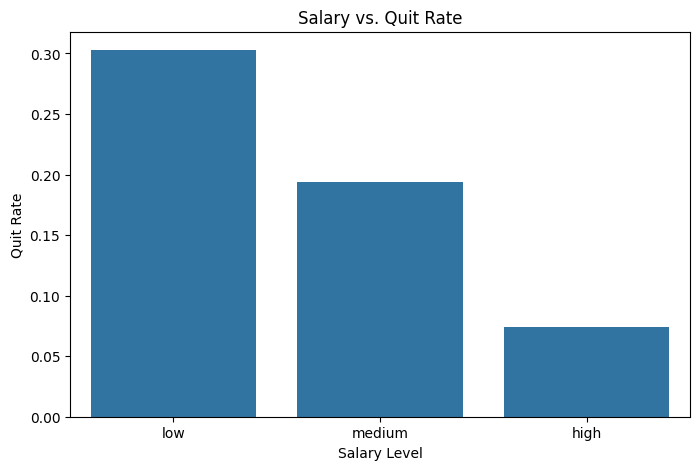

In [56]:
# Plot 5: Salary vs. Quit Rate
plt.figure(figsize=(8, 5))
# Replace 'df' with 'data2' for the data parameter
sns.barplot(x='SALARY', y='QUIT_THE_COMPANY', data=data2, ci=None, order=['low', 'medium', 'high'])
plt.title("Salary vs. Quit Rate")
plt.xlabel("Salary Level")
plt.ylabel("Quit Rate")
plt.show();

<ipython-input-58-8bb0d991be93>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='REMOTE_WORK', y='QUIT_THE_COMPANY', data=data2, ci=None)  # Change df to data2


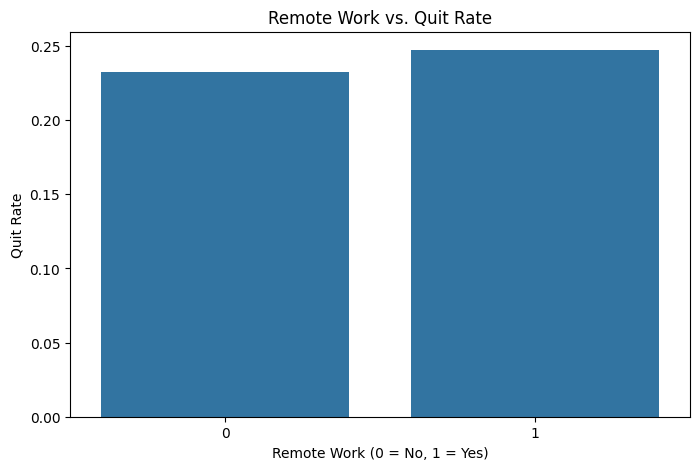

In [58]:
# Plot 6: Remote Work vs. Quit Rate
plt.figure(figsize=(8, 5))
sns.barplot(x='REMOTE_WORK', y='QUIT_THE_COMPANY', data=data2, ci=None)  # Change df to data2
plt.title("Remote Work vs. Quit Rate")
plt.xlabel("Remote Work (0 = No, 1 = Yes)")
plt.ylabel("Quit Rate")
plt.show()

**CORRELATION**

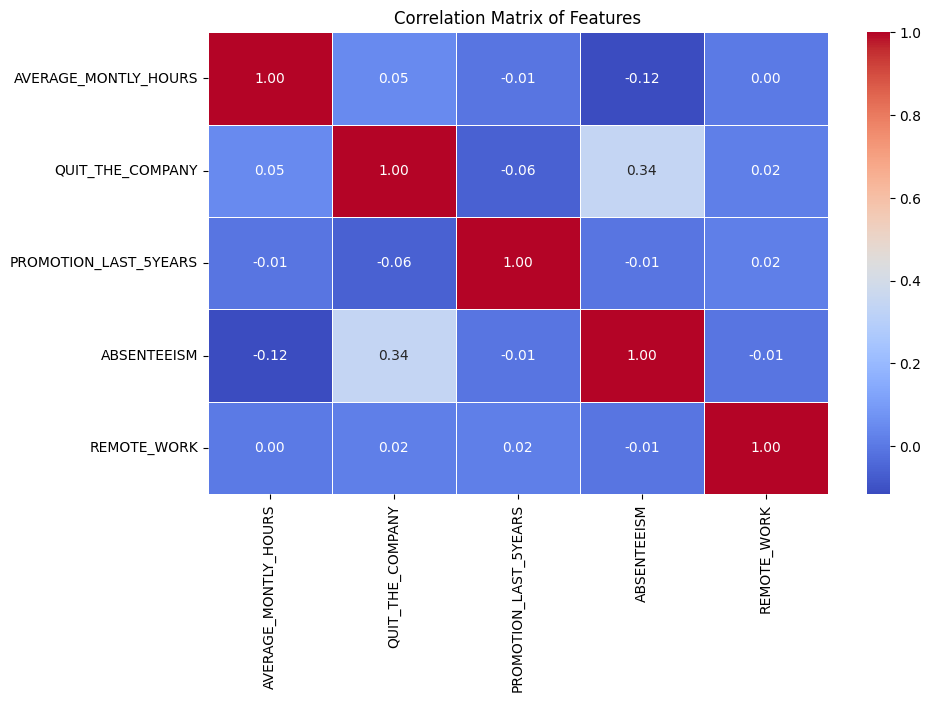

In [61]:
# Compute correlation matrix for numerical features
# Select only numerical columns before calculating correlation
numerical_data2 = data2.select_dtypes(include=['number'])
correlation_matrix = numerical_data2.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()